In [4]:
import pandas as pd
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

from src.globals import *

In [5]:
df_imu = pd.read_parquet(path_imu_results)
df_motor = pd.read_parquet(path_motor_results)
df_series = pd.read_parquet(path_series_results)

In [6]:
cols = [f'{sensor}_{score}' for sensor in imu_sensors + motor_sensors for score in ['zscore', 'mzscore'] ]
rpc_dict = { colname : precision_recall_curve(df_series['anomaly'] != "none", df_series[colname]) for colname in cols}

In [9]:
def plot_curves(rpcdict, title="", colnums=3, thresholds=False):
    # Calculate the number of rows needed
    cols = colnums
    num_plots = len(rpcdict)
    rows = (num_plots + cols - 1) // cols  # Ceiling division to ensure enough rows

    # Create a figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))

    # Flatten axes for easy indexing if needed
    axes = axes.flatten()


    # Loop through the DataFrames and plot each in the corresponding subplot
    for i, (name, (precision, recall, thresholds)) in enumerate(rpcdict.items()):
        axes[i].plot(thresholds, precision[:-1], label="precision")
        axes[i].plot(thresholds, recall[:-1], label="recall")
        axes[i].legend()
        axes[i].set_title(name)
        #axes[i].set_xlim(0, 1)
        axes[i].set_ylim(0, 1) 
        #axes[i].axis('scaled')

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(title)
    plt.tight_layout()

    # Show the plot
    plt.show()

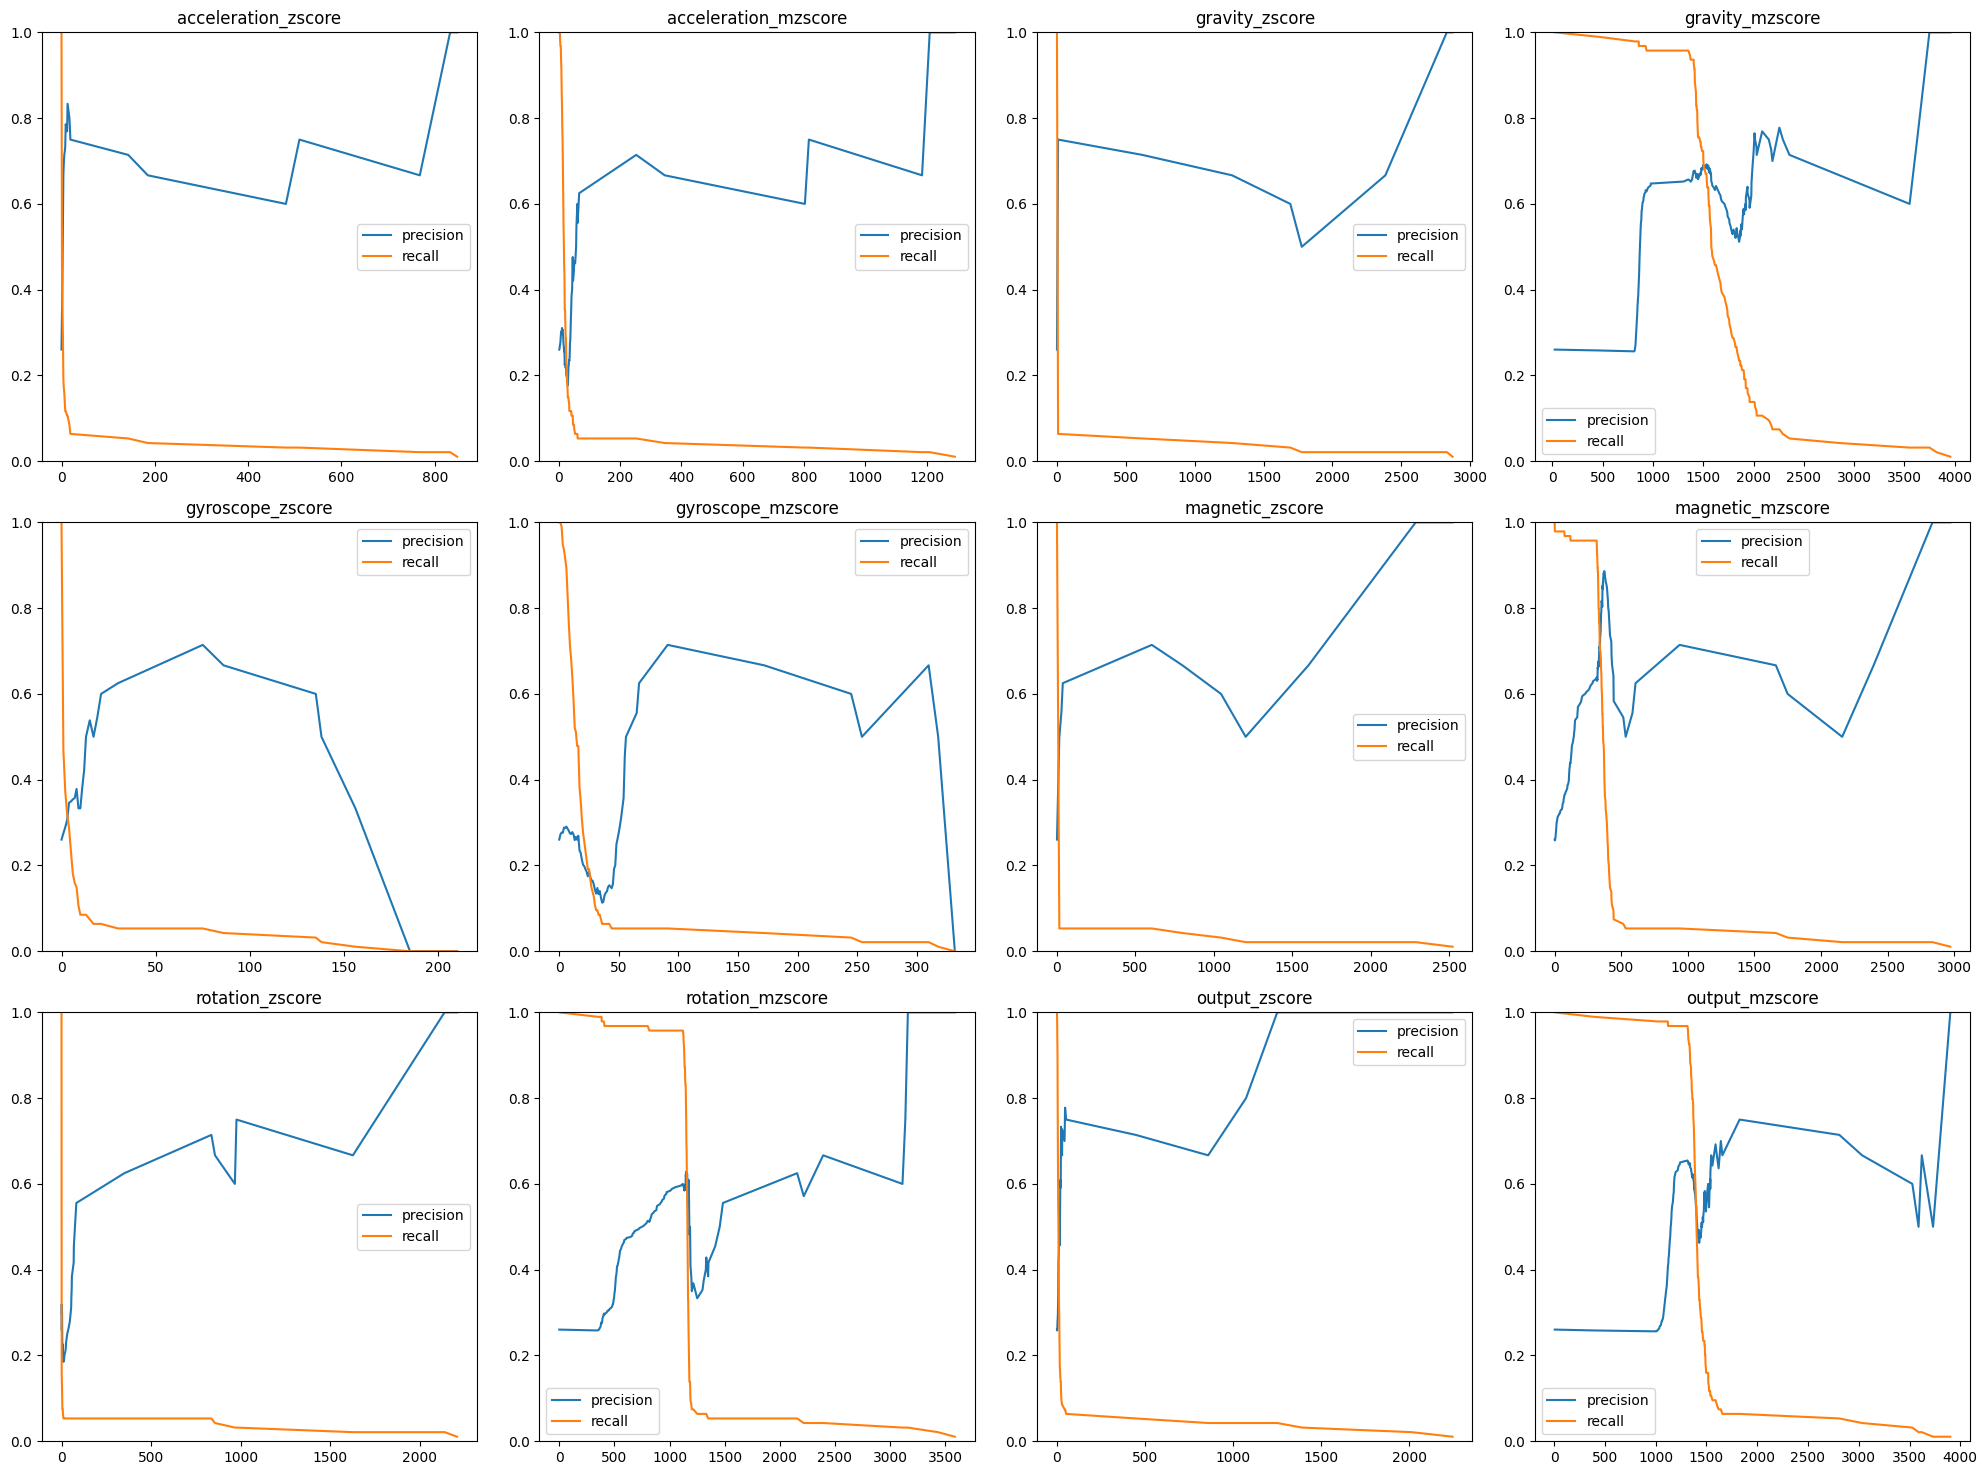

In [10]:
plot_curves(rpc_dict, colnums=4)